In [1]:
import numpy as np
import cvxpy as cp

from tqdm import tqdm
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.utils.data as Data
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
from models.LISTA_CPSS import LISTA_CPSS
from models.LISTA import LISTA_vanilla

from utils.train import train
from utils.synthetic_data import SyntheticSignals

In [3]:
torch.cuda.is_available()

True

In [6]:
M = 1
LAYERS = 16
BETA_INIT = 0.4
EPOCHS = 50
SNR = None

n_ = 500
m_ = 250
p_ = 0.1

# Sensing matrix

A_ = torch.normal(0, torch.sqrt(torch.tensor(1/m_)), size = (m_, n_))
A_ /= torch.linalg.norm(A_, dim = 0)

# Building a training set and a test set 
train_set = SyntheticSignals(
    A = A_,
    n = n_,        
    m = m_,
    p = p_,
    SNR = SNR,
    size = 4000
    ).set_loader()

test_set = SyntheticSignals(
    A = A_,
    n = n_,        
    m = m_,
    p = p_,
    SNR = SNR,
    size = 1000
    ).set_loader()

model = LISTA_vanilla(torch.clone(A_), BETA_INIT, LAYERS)
train(model, train_set, test_set, num_epochs=50, verbose = True)

Epoch 0, Train NMSE (dB) 27.55253628, Validation NMSE (dB) 18.68882543
Epoch 10, Train NMSE (dB) 80.73978808, Validation NMSE (dB) 68.81712211


KeyboardInterrupt: 

In [7]:
model.beta

Parameter containing:
tensor([[[0.0698]],

        [[0.6353]],

        [[0.5992]],

        [[0.5562]],

        [[0.5145]],

        [[0.4362]],

        [[0.3952]],

        [[0.3618]],

        [[0.3137]],

        [[0.2549]],

        [[0.2025]],

        [[0.1543]],

        [[0.1311]],

        [[0.1151]],

        [[0.0980]],

        [[0.0766]],

        [[0.1395]]], device='cuda:0', requires_grad=True)

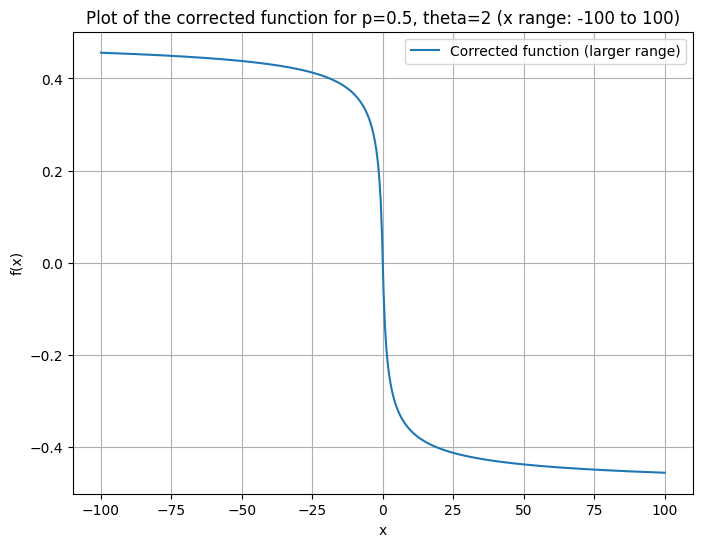

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the corrected function based on the new expression
def f_corrected(x, p=0.5, theta=2):
    term1 = (1 - (1 + theta * np.abs(x)) ** (-p))
    term2 = (p - 1) * np.abs(x) * (1 + theta * np.abs(x)) ** (-p - 1)
    return -np.sign(x) * p * (term1 + term2)

# Generate x values for a larger range (-100, 100)
x_vals_large = np.linspace(-100, 100, 400)

# Calculate the y values using the corrected function
y_vals_large = f_corrected(x_vals_large, p=0.5, theta=2)

# Plot the corrected function for the larger range
plt.figure(figsize=(8, 6))
plt.plot(x_vals_large, y_vals_large, label=r'Corrected function (larger range)')
plt.title('Plot of the corrected function for p=0.5, theta=2 (x range: -100 to 100)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


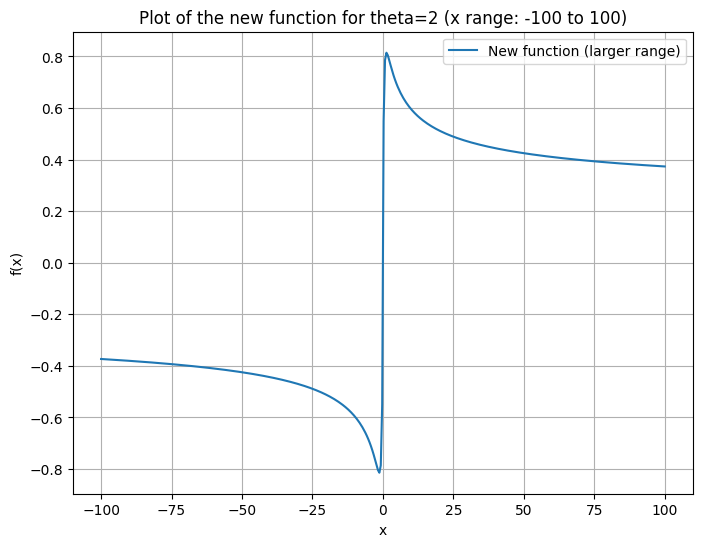

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function from the new expression
def new_function(x, theta=2):
    numerator = 2 * theta * np.abs(x)
    denominator = np.log(1 + theta * np.abs(x)) * (1 + theta * np.abs(x))
    term1 = numerator / denominator
    term2 = (theta**2 * np.abs(x)) / ((1 + theta * np.abs(x))**2 * np.log(1 + theta * np.abs(x)))
    return np.sign(x) * (term1 - term2)

# Generate x values for a larger range (-100, 100)
x_vals_large = np.linspace(-100, 100, 400)

# Calculate the y values using the function
y_vals_large = new_function(x_vals_large, theta=2)

# Plot the function for the larger range
plt.figure(figsize=(8, 6))
plt.plot(x_vals_large, y_vals_large, label=r'New function (larger range)')
plt.title('Plot of the new function for theta=2 (x range: -100 to 100)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()
